In [380]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Preprocessing the raw data

In [381]:
# iterate over all WASDE csv files in the data folder and vertically concatenate them
path = 'data collection/WASDE data/*/*.csv'
all_files = glob.glob(path)
df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
print(concatenated_df.shape)
concatenated_df.head()

(832923, 16)


,WasdeNumber,ReportDate,ReportTitle,Attribute,ReliabilityProjection,Commodity,Region,MarketYear,ProjEstFlag,AnnualQuarterFlag,Value,Unit,ReleaseDate,ReleaseTime,ForecastYear,ForecastMonth
0,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Beginning stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,1975.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
1,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Domestic,NaN,Sugar,Mexico,2008/09,Est.,Annual,5540.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
2,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Ending Stocks,NaN,Sugar,Mexico,2008/09,Est.,Annual,488.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
3,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Exports,NaN,Sugar,Mexico,2008/09,Est.,Annual,1367.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4
4,481,April 2010,Mexico Sugar Supply and Use and High Fructose ...,Imports,NaN,Sugar,Mexico,2008/09,Est.,Annual,160.0,"1000 Metric Tons, Actual Weight",2010-04-09,08:30:00.0000000,2010,4


In [382]:
crude_oil_df = pd.read_csv('data collection/Crude Oil WTI Futures Historical Data - daily data 10 years.csv')
gold_df = pd.read_csv('data collection/SPDR Gold Shares (GLD) - yahoo finance, 10 years.csv')
sp500_df = pd.read_csv('data collection/S&P 500 Historical Data - daily data 10 years.csv')
silver_df = pd.read_csv('data collection/Silver Futures Historical Data - daily data 10 years.csv')
corn_df = pd.read_csv('data collection/US Corn Futures Historical Data - daily data 10 years.csv')
dollar_rate_df = pd.read_csv('data collection/US Dollar Index Historical Data - daily data 10 years.csv')
soybean_df = pd.read_csv('data collection/US Soybeans Futures Historical Data - daily data 10 years.csv')

cpi_df = pd.read_csv('data collection/Customer Price Index.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m-%d')
cpi_df = cpi_df[cpi_df['DATE'] >= '2013-01']
cpi_df.rename(columns={'CPIAUCSL':'CPI', 'DATE':'Date'}, inplace=True)
ppi_df = pd.read_csv('data collection/Producer Price Index.csv')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m-%d')
ppi_df.rename(columns={'PPIACO':'PPI', 'DATE':'Date'}, inplace=True)
ppi_df
dfs_dict = {
    'crude_oil_df': crude_oil_df,
    #'food_price_df': food_price_df,
    'gold_df': gold_df,
    'sp500_df': sp500_df,
    'silver_df': silver_df,
    #'corn_df': corn_df,
    'dollar_rate_df': dollar_rate_df,
    #'soybean_df': soybean_df
    'cpi_df': cpi_df,
    'ppi_df': ppi_df,
}

In [383]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low     Vol. Change %
 0     07/29/2024  75.56  77.28  77.69  75.52      NaN   -2.21%
 1     07/28/2024  77.27  77.47  77.48  77.22      NaN    0.14%
 2     07/26/2024  77.16  78.35  78.60  76.19  365.12K   -1.43%
 3     07/25/2024  78.28  77.50  78.47  76.04  457.29K    0.89%
 4     07/24/2024  77.59  77.45  78.19  76.98  355.97K    0.82%
 ...          ...    ...    ...    ...    ...      ...      ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195.87K   -0.04%
 3040  01/07/2013  93.19  93.21  93.35  92.42  166.29K    0.11%
 3041  01/04/2013  93.09  92.86  93.21  91.52  210.75K    0.18%
 3042  01/03/2013  92.92  92.91  93.30  92.49  189.81K   -0.21%
 3043  01/02/2013  93.12  91.78  93.87  91.56  203.87K    1.42%
 
 [3044 rows x 7 columns],
 'gold_df':             Date        Open        High         Low       Close   Adj Close   
 0     2014-01-02  117.930000  118.730003  117.750000  118.000000  118.000000  \
 1     2014-01-

In [384]:
"""# Identify and drop columns that start with "Unnamed"
food_price_df = pd.read_csv('data collection/Food_price_indices_data_jul.csv')
food_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith('Unnamed')]
food_price_df['Date'] = pd.to_datetime(food_price_df['Date'], format='%Y-%m')

# Filter rows starting from January 2013
filtered_foodprice_df = food_price_df[food_price_df['Date'] >= '2013-01']
filtered_foodprice_df['Date'] = filtered_foodprice_df['Date'].dt.strftime('%Y-%m')
rename_dict = {
    'Meat': 'Meat FP Index',
    'Dairy': 'Dairy FP Index',
    'Cereals': 'Cereals FP Index',
    'Oils': 'Oils FP Index',
    'Sugar': 'Sugar FP Index'
}
# Rename columns
filtered_foodprice_df.rename(columns=rename_dict, inplace=True)
# Display the filtered DataFrame
print(filtered_foodprice_df)"""

'# Identify and drop columns that start with "Unnamed"\nfood_price_df = pd.read_csv(\'data collection/Food_price_indices_data_jul.csv\')\nfood_price_df = food_price_df.loc[:, ~food_price_df.columns.str.startswith(\'Unnamed\')]\nfood_price_df[\'Date\'] = pd.to_datetime(food_price_df[\'Date\'], format=\'%Y-%m\')\n\n# Filter rows starting from January 2013\nfiltered_foodprice_df = food_price_df[food_price_df[\'Date\'] >= \'2013-01\']\nfiltered_foodprice_df[\'Date\'] = filtered_foodprice_df[\'Date\'].dt.strftime(\'%Y-%m\')\nrename_dict = {\n    \'Meat\': \'Meat FP Index\',\n    \'Dairy\': \'Dairy FP Index\',\n    \'Cereals\': \'Cereals FP Index\',\n    \'Oils\': \'Oils FP Index\',\n    \'Sugar\': \'Sugar FP Index\'\n}\n# Rename columns\nfiltered_foodprice_df.rename(columns=rename_dict, inplace=True)\n# Display the filtered DataFrame\nprint(filtered_foodprice_df)'

In [385]:
def replace_symbols(value):
    if isinstance(value, (int, float, complex)):
        return value
    if isinstance(value, str):
        if '%' in value:
            return float(value.replace('%', ''))
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif ',' in value:
            return float(value.replace(',', ''))
    return value

for df_name, df in dfs_dict.items():
    try:
        # Convert all columns except 'Date' using replace_symbols
        for col in df.columns:
            if col != 'Date':
                df[col] = df[col].apply(replace_symbols)

        # Display the DataFrame overview and boxplot
        """ print(f"Overview of {df_name}:")
        print(df)
        
        # Plot boxplots
        plt.figure(figsize=(10, 6))
        df.drop(columns='Date').boxplot()
        plt.title(f'Boxplot of {df_name}')
        plt.show()"""
    
    except Exception as e:
        print(f"Error with {df_name}: {e}")
        continue



In [386]:
dfs_dict

{'crude_oil_df':             Date  Price   Open   High    Low      Vol.  Change %
 0     07/29/2024  75.56  77.28  77.69  75.52       NaN     -2.21
 1     07/28/2024  77.27  77.47  77.48  77.22       NaN      0.14
 2     07/26/2024  77.16  78.35  78.60  76.19  365120.0     -1.43
 3     07/25/2024  78.28  77.50  78.47  76.04  457290.0      0.89
 4     07/24/2024  77.59  77.45  78.19  76.98  355970.0      0.82
 ...          ...    ...    ...    ...    ...       ...       ...
 3039  01/08/2013  93.15  93.32  93.80  92.67  195870.0     -0.04
 3040  01/07/2013  93.19  93.21  93.35  92.42  166290.0      0.11
 3041  01/04/2013  93.09  92.86  93.21  91.52  210750.0      0.18
 3042  01/03/2013  92.92  92.91  93.30  92.49  189810.0     -0.21
 3043  01/02/2013  93.12  91.78  93.87  91.56  203870.0      1.42
 
 [3044 rows x 7 columns],
 'gold_df':             Date        Open        High         Low       Close   Adj Close   
 0     2014-01-02  117.930000  118.730003  117.750000  118.000000  118.0

In [387]:
for df in dfs_dict.values():
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns to include dataframe name as prefix
for name, df in dfs_dict.items():
    prefix = name.replace('_df', '')  # Remove '_df' from dataframe name
    df.rename(columns=lambda x: f"{prefix}_{x}" if x != 'Date' else x, inplace=True)

# Start with the first dataframe
merged_df = list(dfs_dict.values())[0]
print(merged_df)
# Iteratively merge remaining dataframes
for df in list(dfs_dict.values())[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High   
0    2024-07-29            75.56           77.28           77.69  \
1    2024-07-28            77.27           77.47           77.48   
2    2024-07-26            77.16           78.35           78.60   
3    2024-07-25            78.28           77.50           78.47   
4    2024-07-24            77.59           77.45           78.19   
...         ...              ...             ...             ...   
3039 2013-01-08            93.15           93.32           93.80   
3040 2013-01-07            93.19           93.21           93.35   
3041 2013-01-04            93.09           92.86           93.21   
3042 2013-01-03            92.92           92.91           93.30   
3043 2013-01-02            93.12           91.78           93.87   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %  
0             75.52             NaN               -2.21  
1             77.22             NaN                0.14  
2        

In [388]:
# Filter the DataFrame from 2014 onwards
merged_df = merged_df[merged_df['Date'].dt.year >= 2014]

# Display the filtered DataFrame
print(merged_df)

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High   
0    2024-07-29            75.56           77.28           77.69  \
1    2024-07-28            77.27           77.47           77.48   
2    2024-07-26            77.16           78.35           78.60   
3    2024-07-25            78.28           77.50           78.47   
4    2024-07-24            77.59           77.45           78.19   
...         ...              ...             ...             ...   
3127 2022-10-01              NaN             NaN             NaN   
3128 2023-04-01              NaN             NaN             NaN   
3129 2023-07-01              NaN             NaN             NaN   
3130 2023-10-01              NaN             NaN             NaN   
3131 2024-06-01              NaN             NaN             NaN   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %   gold_Open   
0             75.52             NaN               -2.21  221.259995  \
1             77.22             NaN      

In [389]:
cleaned_df = merged_df.dropna(axis=1, how='all')
cleaned_df

,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,...,silver_Low,silver_Vol.,silver_Change %,dollar_rate_Price,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI
0,2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,221.259995,221.550003,219.050003,...,27.457,NaN,-1.93,104.66,104.37,104.67,104.14,0.27,NaN,NaN
1,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,NaN,NaN,NaN,...,28.050,NaN,0.86,104.37,104.33,104.37,104.29,0.06,NaN,NaN
2,2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,219.960007,221.039993,219.699997,...,27.750,61460.0,0.16,104.32,104.36,104.45,104.21,-0.04,NaN,NaN
3,2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,219.020004,219.259995,217.520004,...,27.555,117210.0,-4.57,104.36,104.38,104.46,104.08,-0.03,NaN,NaN
4,2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,223.470001,224.880005,221.740005,...,29.065,54910.0,-0.05,104.39,104.48,104.56,104.12,-0.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297.863,265.061
3128,2023-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.032,256.908
3129,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.628,253.835
3130,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307.531,255.192


In [390]:
# Filling NaNs of Sundays (there are Nans on Sundays in all colums except of soybean prices)
sunday_nan_columns = [col for col in cleaned_df.columns if not col.startswith('soy')]
sunday_nan_columns.remove('Date')
cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
cleaned_df['is_holiday'] = 0
# Update 'is_holiday' to 1 where 'soybean_Price' is NaN
cleaned_df.loc[cleaned_df['gold_Close'].isna(), 'is_holiday'] = 1
cleaned_df

C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\646398149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[sunday_nan_columns] = cleaned_df[sunday_nan_columns].fillna(method='ffill')
C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\646398149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['is_holiday'] = 0


,Date,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,...,silver_Vol.,silver_Change %,dollar_rate_Price,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday
0,2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,221.259995,221.550003,219.050003,...,NaN,-1.93,104.66,104.37,104.67,104.14,0.27,NaN,NaN,0
1,2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,221.259995,221.550003,219.050003,...,NaN,0.86,104.37,104.33,104.37,104.29,0.06,NaN,NaN,0
2,2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,219.960007,221.039993,219.699997,...,61460.0,0.16,104.32,104.36,104.45,104.21,-0.04,NaN,NaN,0
3,2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,219.020004,219.259995,217.520004,...,117210.0,-4.57,104.36,104.38,104.46,104.08,-0.03,NaN,NaN,0
4,2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,223.470001,224.880005,221.740005,...,54910.0,-0.05,104.39,104.48,104.56,104.12,-0.06,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2022-10-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,...,68480.0,0.65,79.83,79.86,79.89,79.81,0.00,297.863,265.061,0
3128,2023-04-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,...,68480.0,0.65,79.83,79.86,79.89,79.81,0.00,303.032,256.908,0
3129,2023-07-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,...,68480.0,0.65,79.83,79.86,79.89,79.81,0.00,304.628,253.835,0
3130,2023-10-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,...,68480.0,0.65,79.83,79.86,79.89,79.81,0.00,307.531,255.192,0


In [391]:
print(cleaned_df)

           Date  crude_oil_Price  crude_oil_Open  crude_oil_High   
0    2024-07-29            75.56           77.28           77.69  \
1    2024-07-28            77.27           77.47           77.48   
2    2024-07-26            77.16           78.35           78.60   
3    2024-07-25            78.28           77.50           78.47   
4    2024-07-24            77.59           77.45           78.19   
...         ...              ...             ...             ...   
3127 2022-10-01            98.70           98.61           98.76   
3128 2023-04-01            98.70           98.61           98.76   
3129 2023-07-01            98.70           98.61           98.76   
3130 2023-10-01            98.70           98.61           98.76   
3131 2024-06-01            98.70           98.61           98.76   

      crude_oil_Low  crude_oil_Vol.  crude_oil_Change %   gold_Open   
0             75.52             NaN               -2.21  221.259995  \
1             77.22             NaN      

In [392]:
"""cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
filtered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')

cleaned_df['YearMonth'] = cleaned_df['Date'].dt.to_period('M')

# Extract year-month from monthly data
filtered_foodprice_df['YearMonth'] = filtered_foodprice_df['Date'].dt.to_period('M')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m')
ppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m')

# Extract year-month from CPI and PPI data
cpi_df['YearMonth'] = cpi_df['DATE'].dt.to_period('M')
ppi_df['YearMonth'] = ppi_df['DATE'].dt.to_period('M')
cpi_df = cpi_df[['YearMonth', 'CPI']]
ppi_df = ppi_df[['YearMonth', 'PPI']]
filtered_foodprice_df.drop(columns='Date', inplace=True)

# Merge CPI and PPI data with all_data_df
all_data_df = pd.merge(cleaned_df, cpi_df, on='YearMonth', how='left')
all_data_df = pd.merge(all_data_df, ppi_df, on='YearMonth', how='left')
# Merge DataFrames on YearMonth
#all_data_df = pd.merge(all_data_df, filtered_foodprice_df, on='YearMonth', how='left')

# Drop the temporary YearMonth column
all_data_df.drop(columns='YearMonth', inplace=True)"""


"cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])\nfiltered_foodprice_df['Date'] = pd.to_datetime(filtered_foodprice_df['Date'], format='%Y-%m')\n\ncleaned_df['YearMonth'] = cleaned_df['Date'].dt.to_period('M')\n\n# Extract year-month from monthly data\nfiltered_foodprice_df['YearMonth'] = filtered_foodprice_df['Date'].dt.to_period('M')\ncpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'], format='%Y-%m')\nppi_df['DATE'] = pd.to_datetime(ppi_df['DATE'], format='%Y-%m')\n\n# Extract year-month from CPI and PPI data\ncpi_df['YearMonth'] = cpi_df['DATE'].dt.to_period('M')\nppi_df['YearMonth'] = ppi_df['DATE'].dt.to_period('M')\ncpi_df = cpi_df[['YearMonth', 'CPI']]\nppi_df = ppi_df[['YearMonth', 'PPI']]\nfiltered_foodprice_df.drop(columns='Date', inplace=True)\n\n# Merge CPI and PPI data with all_data_df\nall_data_df = pd.merge(cleaned_df, cpi_df, on='YearMonth', how='left')\nall_data_df = pd.merge(all_data_df, ppi_df, on='YearMonth', how='left')\n# Merge DataFrames on YearMonth\n#all_d

In [393]:
all_data_df = cleaned_df

In [394]:
all_data_df.to_csv('data collection/all_data.csv', index=False)

In [401]:
# Load your dataset (adjust the path if needed)
df = all_data_df
# Set the Date column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

KeyError: 'Date'

C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

                               SARIMAX Results                                
Dep. Variable:             gold_Close   No. Observations:                 2294
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -3966.366
Date:                Fri, 06 Sep 2024   AIC                           7952.733
Time:                        15:45:29   BIC                           8010.109
Sample:                             0   HQIC                          7973.655
                               - 2294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3479      0.173     -2.014      0.044      -0.687      -0.009
ar.L2         -0.5318      0.165     -3.218      0.001      -0.856      -0.208
ar.L3          0.0125      0.021      0.599      0.5

C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results wi

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280


C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1704447799.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predictions = [float(pred) for pred in predictions]


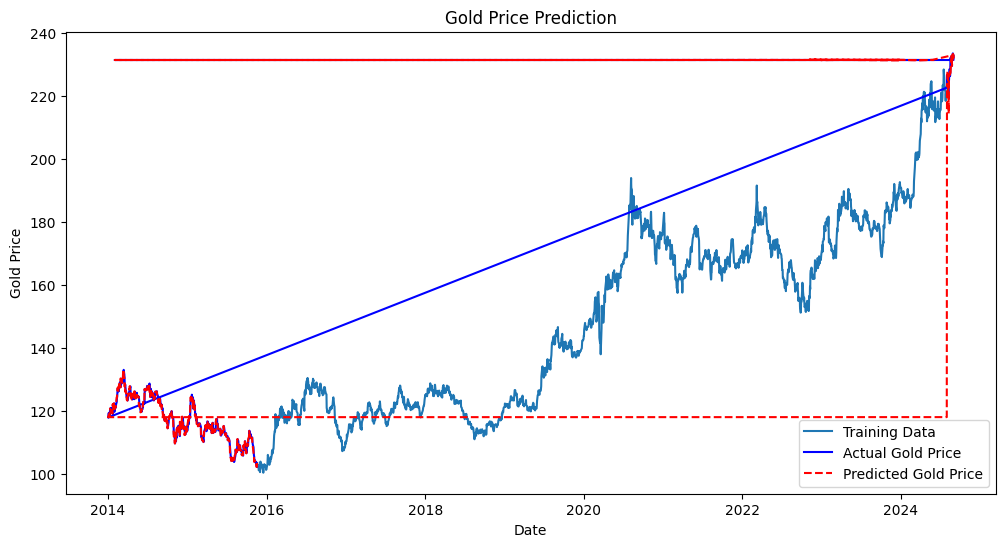

Root Mean Square Error: 4.501600817748917
Mean Absolute Error: 0.9150870540890067


In [396]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use only the gold_Price column for the ARIMA model
gold_prices = df['gold_Close'].dropna()  # Drop missing values

# Split the data into training and testing sets
train_size = int(len(gold_prices) * 0.8)  # 80% training, 20% testing
train_data, test_data = gold_prices[:train_size], gold_prices[train_size:]

# Define and fit the ARIMA model (p, d, q)
# p=4 - looking 4 days back
# d=1 - using the differences (?)
# q=2 - using 2 last errors (?)
model = ARIMA(train_data, order=(7, 1, 2)) 
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

# Forecasting one day ahead using the true data each time
history = list(train_data)  # Create a list from the training data
predictions = []

for t in range(len(test_data)):
    print(t)
    yhat = model_fit.forecast(steps=1)
    predictions.append(yhat)
    history.append(test_data.iloc[t])
    model_fit = model_fit.append([test_data.iloc[t]])
    #model_fit = model_fit.append([yhat])

# Convert predictions to a list of numbers
predictions = [float(pred) for pred in predictions]

# Convert predictions to a DataFrame for easier plotting
pred_index = gold_prices.index[train_size:]  # Create an index for predictions
predictions_df = pd.DataFrame(predictions, index=pred_index, columns=['Predictions'])

# Combine predictions and actual test data
test_data = test_data.to_frame()
test_data = test_data.join(predictions_df)
print(test_data)
# Plotting the results
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data['gold_Close'], color='blue', label='Actual Gold Price')
plt.plot(test_data.index, test_data['Predictions'], color='red', linestyle='--', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['gold_Close'], test_data['Predictions']))
mae = mean_absolute_error(test_data['gold_Close'], test_data['Predictions'])

print(f"Root Mean Square Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

LR: 
Mean Absolute Error (MAE): 1.2008843431040424
Root Mean Squared Error (RMSE): 1.635357918772382

In [397]:
pred_index

DatetimeIndex(['2015-11-18', '2015-11-17', '2015-11-16', '2015-11-13',
               '2015-11-12', '2015-11-11', '2015-11-10', '2015-11-09',
               '2015-11-06', '2015-11-05',
               ...
               '2020-11-01', '2021-05-01', '2021-08-01', '2022-01-01',
               '2022-05-01', '2022-10-01', '2023-04-01', '2023-07-01',
               '2023-10-01', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=574, freq=None)

In [398]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Initialize predictions list
predictions = []

# Copy the initial train_data
current_data = train_data.copy()

# Forecast one step at a time
for i in range(len(test_data[:50])):
    # Fit the model on the current data
    model = ARIMA(current_data, order=(4, 1, 2))
    model_fit = model.fit()
    
    # Forecast the next step
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast)
    
    # Update current_data with the forecasted value
    # Convert forecast to a DataFrame and concatenate
    forecast_series = pd.Series(forecast, index=[test_data[:50].index[i]])
    current_data = pd.concat([current_data, forecast_series])
    
    
    # If the dataset is large, consider trimming it to keep a manageable size
print(predictions)
# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions, index=test_data[:50].index, columns=['Predictions'])
# Check the result
print('Predictions DataFrame:')
print(predictions_df.head())


C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and 

[2294    103.515355
dtype: float64, 2295    103.512884
dtype: float64, 2296    103.530214
dtype: float64, 2297    103.52865
dtype: float64, 2298    103.525656
dtype: float64, 2299    103.526353
dtype: float64, 2300    103.526804
dtype: float64, 2301    103.526613
dtype: float64, 2302    103.526557
dtype: float64, 2303    103.5266
dtype: float64, 2304    103.526604
dtype: float64, 2305    103.526596
dtype: float64, 2306    103.526596
dtype: float64, 2307    103.526598
dtype: float64, 2308    103.526597
dtype: float64, 2309    103.526597
dtype: float64, 2310    103.526597
dtype: float64, 2311    103.526597
dtype: float64, 2312    103.526597
dtype: float64, 2313    103.526597
dtype: float64, 2314    103.526597
dtype: float64, 2315    103.526597
dtype: float64, 2316    103.526597
dtype: float64, 2317    103.526597
dtype: float64, 2318    103.526597
dtype: float64, 2319    103.526597
dtype: float64, 2320    103.526597
dtype: float64, 2321    103.526597
dtype: float64, 2322    103.526597
dty

C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Bar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [399]:
predictions[0]

2294    103.515355
dtype: float64

KeyError: 'gold_Price'

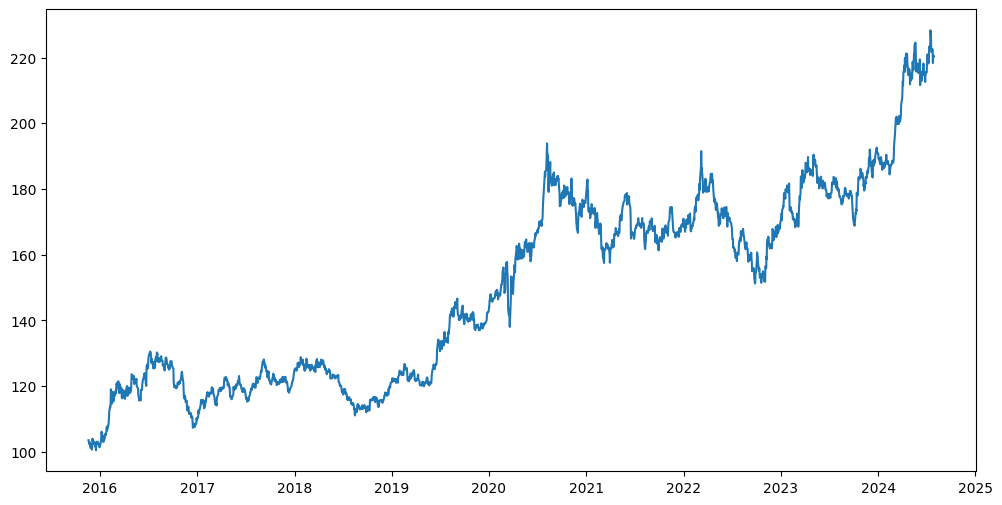

In [400]:
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data['gold_Price'], color='blue', label='Actual Gold Price')
plt.plot(test_data.index, test_data['Predictions'], color='red', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylim(1800, 2000)
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [403]:
import pandas as pd
import numpy as np

# Sample data
dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
gold_prices = pd.Series(np.random.randn(10), index=dates)
train_size = 7
predictions = np.random.randn(len(gold_prices) - train_size)
print(predictions)

# Index for predictions
index_for_predictions = gold_prices.index[train_size:]

# Debug output
print("Index for predictions:")
print(index_for_predictions)
print("Predictions:")
print(predictions)

# Create DataFrame
predictions_df = pd.DataFrame(predictions, index=index_for_predictions, columns=['Predictions'])
print("Predictions DataFrame:")
print(predictions_df)


[ 0.31873802 -0.21473499  0.54778728]
Index for predictions:
DatetimeIndex(['2024-01-08', '2024-01-09', '2024-01-10'], dtype='datetime64[ns]', freq='D')
Predictions:
[ 0.31873802 -0.21473499  0.54778728]
Predictions DataFrame:
            Predictions
2024-01-08     0.318738
2024-01-09    -0.214735
2024-01-10     0.547787


In [404]:
all_data_df.to_csv('all_data.csv', index=False)

In [405]:
all_data_df['gold_price_in_7_days'] = all_data_df['gold_Price'].shift(-7)
all_data_df['gold_price_in_30_days'] = all_data_df['gold_Price'].shift(-30)

KeyError: 'gold_Price'

In [406]:
len(all_data_df)

2868

In [407]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_clean = all_data_df.loc[:, ~all_data_df.columns.str.contains(r'corn|soybean|Dairy|Sugar|Meat|Food|Cereals|Oils|CPI|PPI')]
df_clean = df_clean.dropna()



In [408]:
all_data_df['gold_price_to_predict'] = all_data_df['gold_Close'].shift(-1)
all_data_df['gold_price_yesterday'] = all_data_df['gold_Close'].shift(1)
all_data_df['gold_price_2days'] = all_data_df['gold_Close'].shift(2)
all_data_df['gold_price_3days'] = all_data_df['gold_Close'].shift(3)
all_data_df

C:\Users\Bar\AppData\Local\Temp\ipykernel_32328\1155766837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_df['gold_price_to_predict'] = all_data_df['gold_Close'].shift(-1)


,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,gold_price_to_predict,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,221.259995,221.550003,219.050003,220.320007,...,104.67,104.14,0.27,NaN,NaN,0,220.320007,NaN,NaN,NaN
2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,221.259995,221.550003,219.050003,220.320007,...,104.37,104.29,0.06,NaN,NaN,0,220.630005,220.320007,NaN,NaN
2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,219.960007,221.039993,219.699997,220.630005,...,104.45,104.21,-0.04,NaN,NaN,0,218.330002,220.320007,220.320007,NaN
2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,219.020004,219.259995,217.520004,218.330002,...,104.46,104.08,-0.03,NaN,NaN,0,221.800003,220.630005,220.320007,220.320007
2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,223.470001,224.880005,221.740005,221.800003,...,104.56,104.12,-0.06,NaN,NaN,0,222.580002,218.330002,220.630005,220.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,231.289993,...,79.89,79.81,0.00,297.863,265.061,0,231.289993,231.289993,231.289993,231.289993
2023-04-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,231.289993,...,79.89,79.81,0.00,303.032,256.908,0,231.289993,231.289993,231.289993,231.289993
2023-07-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,231.289993,...,79.89,79.81,0.00,304.628,253.835,0,231.289993,231.289993,231.289993,231.289993


In [409]:
all_data_df

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,gold_price_to_predict,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,221.259995,221.550003,219.050003,220.320007,...,104.67,104.14,0.27,NaN,NaN,0,220.320007,NaN,NaN,NaN
2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,221.259995,221.550003,219.050003,220.320007,...,104.37,104.29,0.06,NaN,NaN,0,220.630005,220.320007,NaN,NaN
2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,219.960007,221.039993,219.699997,220.630005,...,104.45,104.21,-0.04,NaN,NaN,0,218.330002,220.320007,220.320007,NaN
2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,219.020004,219.259995,217.520004,218.330002,...,104.46,104.08,-0.03,NaN,NaN,0,221.800003,220.630005,220.320007,220.320007
2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,223.470001,224.880005,221.740005,221.800003,...,104.56,104.12,-0.06,NaN,NaN,0,222.580002,218.330002,220.630005,220.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,231.289993,...,79.89,79.81,0.00,297.863,265.061,0,231.289993,231.289993,231.289993,231.289993
2023-04-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,231.289993,...,79.89,79.81,0.00,303.032,256.908,0,231.289993,231.289993,231.289993,231.289993
2023-07-01,98.70,98.61,98.76,98.54,251250.0,0.28,232.529999,232.860001,230.550003,231.289993,...,79.89,79.81,0.00,304.628,253.835,0,231.289993,231.289993,231.289993,231.289993


In [410]:
X = all_data_df.drop(columns=['gold_price_to_predict'])

# Extract y
y = all_data_df['gold_price_to_predict']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [411]:
X_train

,crude_oil_Price,crude_oil_Open,crude_oil_High,crude_oil_Low,crude_oil_Vol.,crude_oil_Change %,gold_Open,gold_High,gold_Low,gold_Close,...,dollar_rate_Open,dollar_rate_High,dollar_rate_Low,dollar_rate_Change %,cpi_CPI,ppi_PPI,is_holiday,gold_price_yesterday,gold_price_2days,gold_price_3days
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-29,75.56,77.28,77.69,75.52,NaN,-2.21,221.259995,221.550003,219.050003,220.320007,...,104.37,104.67,104.14,0.27,NaN,NaN,0,NaN,NaN,NaN
2024-07-28,77.27,77.47,77.48,77.22,NaN,0.14,221.259995,221.550003,219.050003,220.320007,...,104.33,104.37,104.29,0.06,NaN,NaN,0,220.320007,NaN,NaN
2024-07-26,77.16,78.35,78.60,76.19,365120.0,-1.43,219.960007,221.039993,219.699997,220.630005,...,104.36,104.45,104.21,-0.04,NaN,NaN,0,220.320007,220.320007,NaN
2024-07-25,78.28,77.50,78.47,76.04,457290.0,0.89,219.020004,219.259995,217.520004,218.330002,...,104.38,104.46,104.08,-0.03,NaN,NaN,0,220.630005,220.320007,220.320007
2024-07-24,77.59,77.45,78.19,76.98,355970.0,0.82,223.470001,224.880005,221.740005,221.800003,...,104.48,104.56,104.12,-0.06,NaN,NaN,0,218.330002,220.630005,220.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-25,43.04,42.69,43.25,41.72,383160.0,0.40,102.470001,102.690002,102.209999,102.459999,...,99.56,100.17,99.31,0.27,237.761,183.5,0,101.250000,101.250000,101.919998
2015-11-24,42.87,42.04,43.46,41.86,430300.0,2.68,103.120003,103.250000,102.690002,102.940002,...,99.68,99.78,99.47,-0.27,237.761,183.5,0,102.459999,101.250000,101.250000
2015-11-23,41.75,41.49,42.75,40.41,516190.0,3.37,102.480003,102.750000,102.160004,102.260002,...,99.66,100.00,99.53,0.24,237.761,183.5,0,102.940002,102.459999,101.250000


In [412]:
#data_len = len(df_clean)
"""features = df_clean.loc[:, ~df_clean.columns.str.contains('gold')]
gold = df_clean['gold_price_in_7_days']
X_train = features.iloc[:int(data_len*0.8)]
X_test = features.iloc[int(data_len*0.8):]
y_train = gold.iloc[:int(data_len*0.8)]
y_test = gold.iloc[int(data_len*0.8):]"""
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

# Drop rows with NaN in X_test and y_test
X_test_dropped = X_test.dropna()
y_test_dropped = y_test.loc[X_test_dropped.index]  # Drop NaNs based on indices in X_test_dropped

# Ensure that y_test_dropped does not contain NaN values
X_test_dropped = X_test_dropped.dropna()
y_test_dropped = y_test_dropped.dropna()

# Check if indices still match after dropping NaNs
common_index = X_test_dropped.index.intersection(y_test_dropped.index)
X_test_dropped = X_test_dropped.loc[common_index]
y_test_dropped = y_test_dropped.loc[common_index]
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_dropped, y_train_dropped)

# Predict on test data
y_pred = model.predict(X_test_dropped)
#print(model.summary)
# Evaluate the model
mse = mean_squared_error(y_test_dropped, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_dropped, y_pred)
mae = mean_absolute_error(y_test_dropped, y_pred)


print("Linear Regression Model Summary")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model Summary
Intercept: -0.3995615629736733
Coefficients: [ 8.57017089e-02  8.38989591e-02 -6.81463204e-02 -1.02190707e-01
 -1.52763088e-07  3.60104972e-03  4.82886973e-01  1.29046202e-01
  2.93921439e-01  5.24004942e-02  5.24004936e-02  3.68271052e-10
 -5.27435988e-03 -7.33027500e-03  5.92195142e-03  6.62200740e-03
  3.43639014e-02 -3.64025196e-01  2.16823345e+00 -7.31677459e-01
 -1.05863796e+00  3.44673909e-07 -1.15866254e-01 -4.19460337e-01
 -3.97348686e-01  2.23587612e-01  5.98174064e-01  3.81057056e-01
  1.67398538e-03  2.55229804e-04  7.77156117e-16 -3.20957596e-02
  8.87541888e-03  9.02894241e-03]
Mean Squared Error (MSE): 20.345011515160422
Mean Absolute Error (MAE): 0.6917457071519506
Root Mean Squared Error (RMSE): 4.510544481008964
R-squared (R2): 0.9870634625835784


In [413]:
comparison_df = pd.DataFrame({
    'Actual': y_test_dropped,
    'Predicted': y_pred
})

# Display the first few rows of the DataFrame
print(comparison_df.head())

                Actual   Predicted
Date                              
2015-11-18  102.339996  102.741234
2015-11-17  103.709999  103.340311
2015-11-16  103.559998  104.131250
2015-11-13  103.849998  103.760554
2015-11-12  103.830002  103.222570


In [414]:
print(y_pred)

[102.74123372 103.34031094 104.13124977 103.76055441 103.22257002
 104.09413632 104.67383795 104.77245728 105.03005121 106.19038201
 107.25682652 107.97689249 109.26319396 109.23405454 110.97010706
 111.34967053 111.43079982 111.36588789 111.71251928 111.81130504
 112.61468995 112.43896595 113.04891707 113.44812026 113.73345137
 112.14120546 111.34389339 111.22383976 110.09234923 110.18133028
 109.5706322  108.99437578 108.33396432 107.00139031 106.58807332
 107.25339855 108.30038973 109.48584999 109.86818094 108.95657678
 108.32054053 108.77087352 108.93327099 108.76791372 106.84053037
 105.85225853 106.18638535 106.4096852  106.23656609 106.32808616
 106.81931777 107.71009285 107.42912835 107.38627016 107.30886917
 107.91590235 109.19234833 108.89288989 108.32434474 108.39534767
 107.1014423  109.36069677 110.68573103 110.87225911 110.66397934
 109.10646925 106.90268337 108.09712848 107.32337346 107.40491139
 107.4160036  106.19805825 106.25355258 104.31506285 104.33354166
 104.05500

In [415]:
len(df_clean.columns)

29

In [416]:
import numpy as np

In [417]:
np.array([model.feature_names_in_, model.coef_]).T

array([['crude_oil_Price', 0.08570170886211721],
       ['crude_oil_Open', 0.08389895908683416],
       ['crude_oil_High', -0.0681463203514362],
       ['crude_oil_Low', -0.10219070746960313],
       ['crude_oil_Vol.', -1.5276308811629522e-07],
       ['crude_oil_Change %', 0.0036010497203163294],
       ['gold_Open', 0.48288697326154373],
       ['gold_High', 0.129046202317527],
       ['gold_Low', 0.29392143925837605],
       ['gold_Close', 0.05240049415635671],
       ['gold_Adj Close', 0.052400493605324075],
       ['gold_Volume', 3.682710519038013e-10],
       ['sp500_Price', -0.005274359875177386],
       ['sp500_Open', -0.0073302749985982045],
       ['sp500_High', 0.005921951422094169],
       ['sp500_Low', 0.006622007403807084],
       ['sp500_Change %', 0.03436390138417765],
       ['silver_Price', -0.3640251961388292],
       ['silver_Open', 2.1682334525926943],
       ['silver_High', -0.7316774593907183],
       ['silver_Low', -1.0586379607817267],
       ['silver_Vol.', 3.

In [418]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [419]:
X = all_data_df.drop(columns=['gold_price_to_predict'])

# Extract y
y = all_data_df['gold_price_to_predict']

In [420]:
X_dropped = X.dropna()
y_dropped = y[X_dropped.index].to_numpy()[:-1]
X_dropped = X_dropped.to_numpy()[:-1]

In [496]:
def create_sequences(data, y, seq_length):
    sequences = []
    y_fit = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])  # Last 30 days as input
        y_fit.append(y[i])
    return np.array(sequences), np.array(y_fit)


sequence_length = 4
X_seqs, y_fit = create_sequences(X_dropped, y, sequence_length)
X_seqs = torch.tensor(X_seqs, dtype=torch.float32)
y_fit = torch.tensor(y_fit, dtype=torch.float32)



In [497]:
X_train, X_test, y_train, y_test = train_test_split(X_seqs, y_fit, test_size=0.2, shuffle=False)

In [498]:
from torch.utils.data import Dataset, DataLoader


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

# Create the dataset

In [499]:
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

# DataLoader with batching and shuffling
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [500]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        # input_seq: shape (batch_size, seq_len, input_size)
        lstm_out, _ = self.lstm(input_seq)  # No need to reshape
        predictions = self.linear(lstm_out[:, -1, :])  # Only take the output of the last time step
        return predictions


In [520]:
model = LSTMModel(input_size=X_train.shape[2], hidden_layer_size=100, output_size=1)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [521]:
epochs = 150
for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:  # Iterate over batches
        model.hidden_cell = (torch.zeros(1, X_batch.size(0), model.hidden_layer_size),
                             torch.zeros(1, X_batch.size(0), model.hidden_layer_size))

        optimizer.zero_grad()

        predictions = model(X_batch)
        loss = loss_function(torch.ravel(predictions), y_batch)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()*y_batch.shape[0]
    print(f'Epoch {epoch} Loss: {loss.item()/len(train_dataset)}')

Epoch 0 Loss: 11.357520579438729
Epoch 1 Loss: 10.24797786924195
Epoch 2 Loss: 9.77647113288238
Epoch 3 Loss: 10.045141994633275
Epoch 4 Loss: 9.742960539188283
Epoch 5 Loss: 9.977517225234795
Epoch 6 Loss: 9.700691455165474
Epoch 7 Loss: 9.473250223613595
Epoch 8 Loss: 9.81796455724508
Epoch 9 Loss: 9.56790079243068
Epoch 10 Loss: 9.25076954522585
Epoch 11 Loss: 9.174828271746422
Epoch 12 Loss: 8.776883420449463
Epoch 13 Loss: 8.178397354371645
Epoch 14 Loss: 8.684428807021467
Epoch 15 Loss: 8.843344700357783
Epoch 16 Loss: 8.792304897137745
Epoch 17 Loss: 8.644794170673077
Epoch 18 Loss: 7.746582904740608
Epoch 19 Loss: 8.711362889926207
Epoch 20 Loss: 7.62354039719365
Epoch 21 Loss: 8.396452055847496
Epoch 22 Loss: 7.213793814288909
Epoch 23 Loss: 7.417360800536673
Epoch 24 Loss: 7.730416340563506
Epoch 25 Loss: 7.233801553415698
Epoch 26 Loss: 7.659336915809481
Epoch 27 Loss: 7.002367596293604
Epoch 28 Loss: 7.871810012298748
Epoch 29 Loss: 7.459661330221378
Epoch 30 Loss: 6.736795

In [522]:
model.eval()
with torch.no_grad():
    future_price = torch.ravel(model(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, future_price))
    mae = mean_absolute_error(y_test, future_price)

    print(f"Root Mean Square Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")

Root Mean Square Error: 15.348782539367676
Mean Absolute Error: 8.553418159484863
